<a href="https://colab.research.google.com/github/Josh1313/-sales-propensity-models-/blob/main/1_2_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar librerias , google drive , leer pkl de data merge (los tres data sets juntos)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Now, I will begin by reading the relevant documents and familiarizing myself with the project requirements.

#EDA

In [ ]:
# Leer el archivo pickle
df = pd.read_pickle("/content/drive/MyDrive/TFM/concatenado.pkl")

In [ ]:
pd.options.display.float_format = '{:.0f}'.format


In [ ]:
df.shape

(5962924, 30)

In [ ]:
9+7+18 # COLUMNAS DE CADA DATA SET - menos 4 columnas que se removieron por ser por la cuales las juntamos

34

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 30 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0_x        int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   entry_date          object 
 4   entry_channel       object 
 5   active_customer     float64
 6   segment             object 
 7   Unnamed: 0_y        int64  
 8   short_term_deposit  int64  
 9   loans               int64  
 10  mortgage            int64  
 11  funds               int64  
 12  securities          int64  
 13  long_term_deposit   int64  
 14  em_account_pp       int64  
 15  credit_card         int64  
 16  payroll             float64
 17  pension_plan        float64
 18  payroll_account     int64  
 19  emc_account         int64  
 20  debit_card          int64  
 21  em_account_p        int64  
 22  em_acount           int64  
 23  Unnamed: 0          int64  
 24  country_id          obje

In [ ]:
df.describe()

,Unnamed: 0_x,pk_cid,active_customer,Unnamed: 0_y,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,...,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,Unnamed: 0,region_code,age,salary
count,5962924,5962924,5962924,5962924,5962924,5962924,5962924,5962924,5962924,5962924,...,5962863,5962924,5962924,5962924,5962924,5962924,5962924,5960660,5962924,4450821
mean,7155425,1234930,0,7155425,0,0,0,0,0,0,...,0,0,0,0,0,1,7155425,26,30,115817
std,3920784,162302,0,3920784,0,0,0,0,0,0,...,0,0,0,0,0,0,3920784,14,12,199552
min,0,15891,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1203
25%,4240386,1112532,0,4240386,0,0,0,0,0,0,...,0,0,0,0,0,0,4240386,13,22,61501
50%,7499346,1231097,0,7499346,0,0,0,0,0,0,...,0,0,0,0,0,1,7499346,28,25,88655
75%,10201422,1352339,1,10201422,0,0,0,0,0,0,...,0,0,0,0,0,1,10201422,36,34,131670
max,13647308,1553689,1,13647308,1,1,1,1,1,1,...,1,1,1,1,1,1,13647308,52,105,28894396


array([[<Axes: title={'center': 'Unnamed: 0_x'}>,
        <Axes: title={'center': 'pk_cid'}>,
        <Axes: title={'center': 'active_customer'}>,
        <Axes: title={'center': 'Unnamed: 0_y'}>,
        <Axes: title={'center': 'short_term_deposit'}>],
       [<Axes: title={'center': 'loans'}>,
        <Axes: title={'center': 'mortgage'}>,
        <Axes: title={'center': 'funds'}>,
        <Axes: title={'center': 'securities'}>,
        <Axes: title={'center': 'long_term_deposit'}>],
       [<Axes: title={'center': 'em_account_pp'}>,
        <Axes: title={'center': 'credit_card'}>,
        <Axes: title={'center': 'payroll'}>,
        <Axes: title={'center': 'pension_plan'}>,
        <Axes: title={'center': 'payroll_account'}>],
       [<Axes: title={'center': 'emc_account'}>,
        <Axes: title={'center': 'debit_card'}>,
        <Axes: title={'center': 'em_account_p'}>,
        <Axes: title={'center': 'em_acount'}>,
        <Axes: title={'center': 'Unnamed: 0'}>],
       [<Axes: tit

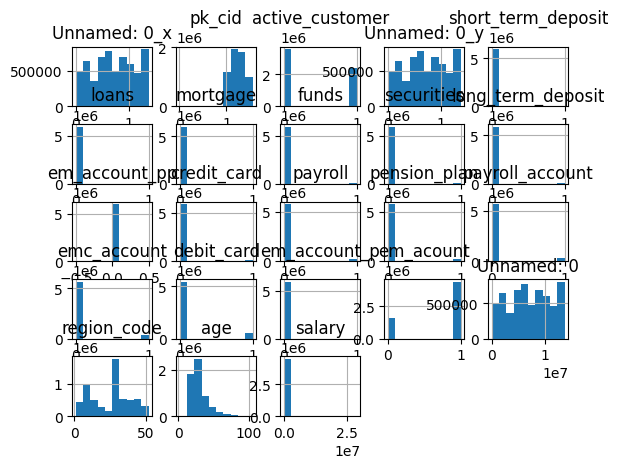

In [ ]:
df.hist()

# Data Cleaning ,Preprocesing ,Correction of topias

In [ ]:
df.rename(columns={'em_acount': 'Cuenta easyMoney', 'em_account_p': 'Cuenta easyMoney+', 'em_account_pp': 'Cuenta easyMoney++', 'emc_account': 'Cuenta easyMoney Crypto', 'pk_cid': 'Unique_ID_client'}, inplace=True)

In [ ]:
df = df.drop(["Unnamed: 0_x", "Unnamed: 0_y", "Unnamed: 0",], axis=1)

In [ ]:
df["pk_partition"] = pd.to_datetime(df["pk_partition"], format="%Y-%m-%d", errors='coerce')
df["entry_date"] = pd.to_datetime(df["entry_date"], format="%Y-%m-%d", errors='coerce')


In [ ]:
gender_mapping = {'H': 'Female', 'V': 'Male'}
df['gender'] = df['gender'].map(gender_mapping)

In [ ]:
df.isnull().sum()

Unique_ID_client                 0
pk_partition                     0
entry_date                    6413
entry_channel               133033
active_customer                  0
segment                     133944
short_term_deposit               0
loans                            0
mortgage                         0
funds                            0
securities                       0
long_term_deposit                0
Cuenta easyMoney++               0
credit_card                      0
payroll                         61
pension_plan                    61
payroll_account                  0
Cuenta easyMoney Crypto          0
debit_card                       0
Cuenta easyMoney+                0
Cuenta easyMoney                 0
country_id                       0
region_code                   2264
gender                          25
age                              0
deceased                         0
salary                     1512103
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Imputacion de nulos

In [ ]:
# Agrupar por país y rellenar los valores faltantes con el canal de entrada más común por país
df['entry_channel'] = df.groupby('country_id')['entry_channel'].transform(lambda x: x.fillna(x.mode()[0]))

Rellenare las fecha con la fecha promedio

In [ ]:
# Calcular la fecha promedio
fecha_promedio = df['entry_date'].mean()

# Rellenar los registros faltantes con la fecha promedio
df['entry_date'] = df['entry_date'].fillna(fecha_promedio)


 para rellenar el segmento  primero identifique los valores unicos entry channel y country id de hay basado en esas dos condiciones rellene segmento

In [ ]:
import pandas as pd

# Agrupar por "entry_channel" y "country_id" y rellenar los valores nulos en "segment"
df['segment'] = df.groupby(['entry_channel', 'country_id'], group_keys=False)['segment'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)



lo mismo aca primeros agrupamos y despues empezamos hacer una media segun las combinaciones y le sacamos la media por los tres atributos que agrupamos

In [ ]:
# Agrupar los datos por "region_code", "country_id" y "age" y calcular la mediana del salario
grouped_data = df.groupby(['region_code', 'country_id', 'age'])['salary'].transform('median')

# Rellenar los valores nulos en "salary" con la mediana correspondiente a la combinación de columnas
df['salary'] = df['salary'].fillna(grouped_data)


In [ ]:
# Agrupar los datos por "country_id" y "age" y calcular la mediana del salario
grouped_data = df.groupby(['country_id', 'age'])['salary'].transform('median')

# Rellenar los valores nulos en "salary" con la mediana correspondiente a la combinación de columnas
df['salary'] = df['salary'].fillna(grouped_data)

In [ ]:
# Calcular la media global de los salarios
global_mean_salary = df['salary'].mean()

# Rellenar los valores nulos en "salary" con la media global
df['salary'] = df['salary'].fillna(global_mean_salary)


En la ultima fase borraremos las filas nans de tres columnas porque son pocos y no afectara el data set

In [ ]:
# Eliminar filas con valores nulos en las columnas especificadas
df.dropna(subset=['gender', 'pension_plan', 'payroll'], inplace=True)


cree un diccionario donde imputamos el valor si cumple los criterios rellenar con un valor que empieze con k y rellenamos region_code

In [ ]:
import pandas as pd

data = [
    [1.0, ['KHE', 'KHD', 'KFC', 'KAT', 'KAZ', 'KEH', 'KFA', 'RED', 'KHK'], ['ES']],
    [2.0, ['KHD', 'KHE', 'KFC', 'KAT', 'KHC', 'KFA', 'KAZ', 'KGC', 'KEH'], ['ES']],
    [3.0, ['KHE', 'KAT', 'KHD', 'KFC', 'KFA', 'KHC', 'KHK', 'KAZ', 'RED'], ['ES']],
]

# Rellenar los valores nulos en 'region_code' con el valor de 'entry_channel' si empiezan con 'K'
df['region_code'] = df['region_code'].fillna(df['entry_channel'].apply(lambda x: x[0] if x[0] == 'K' else None))

In [ ]:
# Eliminar filas con valores nulos en las columnas especificadas ya despues lo me quedaban 19 registros combinados borrre las filas
df.dropna(subset=['region_code', 'segment'], inplace=True)

In [ ]:
df.isnull().sum()

Unique_ID_client           0
pk_partition               0
entry_date                 0
entry_channel              0
active_customer            0
segment                    0
short_term_deposit         0
loans                      0
mortgage                   0
funds                      0
securities                 0
long_term_deposit          0
Cuenta easyMoney++         0
credit_card                0
payroll                    0
pension_plan               0
payroll_account            0
Cuenta easyMoney Crypto    0
debit_card                 0
Cuenta easyMoney+          0
Cuenta easyMoney           0
country_id                 0
region_code                0
gender                     0
age                        0
deceased                   0
salary                     0
dtype: int64

In [ ]:
df.shape

(5962819, 27)

In [ ]:
df = df.reset_index(drop=True)

# Clean Data / Data Engineering

In [ ]:
df.head(5)

,Unique_ID_client,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,Cuenta easyMoney Crypto,debit_card,Cuenta easyMoney+,Cuenta easyMoney,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,...,0,0,0,1,ES,29,Female,35,N,87218
1,1050611,2018-01-28,2015-08-10,KHE,0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13,Male,23,N,35549
2,1050612,2018-01-28,2015-08-10,KHE,0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13,Male,23,N,122179
3,1050613,2018-01-28,2015-08-10,KHD,0,03 - UNIVERSITARIO,1,0,0,0,...,0,0,0,0,ES,50,Female,22,N,119776
4,1050614,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,50,Male,23,N,100738


In [ ]:
df.shape

(5962819, 27)

En la siguiente hacemos una funcion donde primero cambiamos el formato de las columna a bool para poder acceder de una manera mas facil a la logica , lo estamos haciendo es de que si una de las cuentas por las cuales hacemos 10,40,60, se ponga true en la nueva columna y al final las nueva columnas las pasamos bool tru or false que vienen siendo u o ceros

In [ ]:
# Convert relevant columns to boolean type
Bool_columns = ['Cuenta easyMoney', 'Cuenta easyMoney+', 'Cuenta easyMoney++', 'Cuenta easyMoney Crypto', 'payroll_account',
                   'funds', 'long_term_deposit', 'pension_plan', 'securities', 'short_term_deposit',
                   'credit_card', 'debit_card', 'loans', 'mortgage']

df[Bool_columns] = df[Bool_columns].astype(bool)

# Create the 'producto10' column
df['product10'] = (df['Cuenta easyMoney'] | df['Cuenta easyMoney+'] | df['Cuenta easyMoney++'] | df['Cuenta easyMoney Crypto'] | df['payroll_account'])

# Create the 'product40' column
df['product40'] = (df['funds'] | df['long_term_deposit'] | df['pension_plan'] | df['securities'] | df['short_term_deposit'])

# Create the 'product60' column
df['product60'] = (df['credit_card'] | df['debit_card'] | df['loans'] | df['mortgage'])

# Convert the True/False values to 1 and 0
df['product10'] = df['product10'].astype(bool)
df['product40'] = df['product40'].astype(bool)
df['product60'] = df['product60'].astype(bool)

In [ ]:
# Convert relevant columns to boolean type
Bool_columns1 = ['Cuenta easyMoney', 'Cuenta easyMoney+', 'Cuenta easyMoney++', 'Cuenta easyMoney Crypto', 'payroll_account',
                   'funds', 'long_term_deposit', 'pension_plan', 'securities', 'short_term_deposit',
                   'credit_card', 'debit_card', 'loans', 'mortgage']

df[Bool_columns1] = df[Bool_columns1].astype(int)

In [ ]:
df['product60'].sum()

587829

In [ ]:
# Crear una lista de nombres de productos para cada cliente
product_names = ['Cuenta easyMoney', 'Cuenta easyMoney+', 'Cuenta easyMoney++', 'Cuenta easyMoney Crypto', 'payroll_account',
                 'funds', 'long_term_deposit', 'pension_plan', 'securities', 'short_term_deposit',
                 'credit_card', 'debit_card', 'loans', 'mortgage']

# Crear una columna 'Product' con nombres de productos para cada fila del DataFrame
df['Product'] = product_names * (len(df) // len(product_names)) + product_names[:len(df) % len(product_names)]



In [ ]:

# Ordenar el DataFrame por cliente y fecha de entrada
df.sort_values(['Unique_ID_client', 'entry_date'], inplace=True)

# Calcular la diferencia en días entre compras del mismo producto por el mismo cliente
df['dias_entre_compras'] = df.groupby(['Unique_ID_client', 'Product'])['entry_date'].diff().dt.days

# Verificar si un cliente compró o no un producto
df['compra_real'] = df.groupby(['Unique_ID_client', 'Product'])['entry_date'].transform('min') == df['entry_date']

# Calcular el tiempo transcurrido desde la última compra de cualquier producto por el mismo cliente
df['tiempo_desde_ultima_compra_otro'] = df.groupby('Unique_ID_client')['entry_date'].diff().dt.days

# Calcular el tiempo transcurrido entre compras del mismo producto por el mismo cliente
df['tiempo_entre_compras_mismo_producto'] = df.groupby(['Unique_ID_client', 'Product'])['entry_date'].diff().dt.days

# Calcular el tiempo transcurrido desde la última compra de cualquier producto por el mismo cliente usando pk_partition
df['tiempo_desde_ultima_compra_otro_partition'] = df.groupby('Unique_ID_client')['pk_partition'].diff().dt.days

# Calcular el tiempo transcurrido entre compras del mismo producto por el mismo cliente usando pk_partition
df['tiempo_entre_compras_mismo_producto_partition'] = df.groupby(['Unique_ID_client', 'Product'])['pk_partition'].diff().dt.days

# Puedes continuar calculando más características según sea necesario


In [ ]:
df.head()

,Unique_ID_client,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,product40,product60,duracion_meses,dias_entre_compras,compra_real,tiempo_desde_ultima_compra_otro,tiempo_entre_compras_mismo_producto,tiempo_desde_ultima_compra_otro_partition,tiempo_entre_compras_mismo_producto_partition,Product
1479491,15891,2018-07-28,2018-07-28,KAT,1,02 - PARTICULARES,0,0,0,0,...,False,False,2,NaN,True,NaN,NaN,NaN,NaN,Cuenta easyMoney
2168047,15891,2018-08-28,2018-07-28,KAT,0,02 - PARTICULARES,0,0,0,0,...,False,False,2,NaN,True,0,NaN,31,NaN,Cuenta easyMoney+
2962890,16063,2018-11-28,2018-11-19,KAT,1,02 - PARTICULARES,0,0,0,0,...,False,False,7,NaN,True,NaN,NaN,NaN,NaN,Cuenta easyMoney++
3628149,16063,2018-12-28,2018-11-19,KAT,1,02 - PARTICULARES,0,0,0,0,...,False,False,7,NaN,True,0,NaN,30,NaN,Cuenta easyMoney Crypto
4028079,16063,2019-01-28,2018-11-19,KAT,1,02 - PARTICULARES,0,0,0,0,...,False,False,7,NaN,True,0,NaN,31,NaN,payroll_account


In [ ]:
# Rellenar valores NaN con 0 en las nuevas columnas
new_columns = ['dias_entre_compras', 'compra_real', 'tiempo_desde_ultima_compra_otro', 'tiempo_entre_compras_mismo_producto',
               'tiempo_desde_ultima_compra_otro_partition', 'tiempo_entre_compras_mismo_producto_partition']

df[new_columns] = df[new_columns].fillna(0)

# Eliminar la columna 'Product'
df.drop(columns=['Product'], inplace=True)


In [ ]:
df.head(5)

,Unique_ID_client,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,product10,product40,product60,duracion_meses,dias_entre_compras,compra_real,tiempo_desde_ultima_compra_otro,tiempo_entre_compras_mismo_producto,tiempo_desde_ultima_compra_otro_partition,tiempo_entre_compras_mismo_producto_partition
1479491,15891,2018-07-28,2018-07-28,KAT,1,02 - PARTICULARES,0,0,0,0,...,True,False,False,2,0,True,0,0,0,0
2168047,15891,2018-08-28,2018-07-28,KAT,0,02 - PARTICULARES,0,0,0,0,...,False,False,False,2,0,True,0,0,31,0
2962890,16063,2018-11-28,2018-11-19,KAT,1,02 - PARTICULARES,0,0,0,0,...,False,False,False,7,0,True,0,0,0,0
3628149,16063,2018-12-28,2018-11-19,KAT,1,02 - PARTICULARES,0,0,0,0,...,False,False,False,7,0,True,0,0,30,0
4028079,16063,2019-01-28,2018-11-19,KAT,1,02 - PARTICULARES,0,0,0,0,...,False,False,False,7,0,True,0,0,31,0


Guardare data set limpio

In [ ]:
import pickle

In [ ]:
df.to_pickle("/content/drive/MyDrive/TFM/PREPROCESAMIENTO.pkl")

In [ ]:
#Seguire en otro notebook ya que mi Ram de este note book esta a Tope